In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import image




<h1>TASK</h1>

In [ ]:
BASE = "../dataset"
TRAIN_IMAGES = f"{BASE}/train/images"
TRAIN_LABELS = f"{BASE}/train/labels"

VAL_IMAGES = f"{BASE}/valid/images"
VAL_LABELS = f"{BASE}/valid/labels"

TEST_IMAGES = f"{BASE}/test/images"
TEST_LABELS = f"{BASE}/test/labels"

DATA_YAML = f"{BASE}/data.yaml"

In [ ]:
import yaml
with open(DATA_YAML, "r") as f:
    data = yaml.safe_load(f)

CLASSES = data["names"]
print("Classes:", CLASSES)

In [ ]:
def make_coco(img_dir, label_dir, output_json, classes):
    valid_exts = {".jpg", ".jpeg", ".png"}

    coco = {
        "images": [],
        "annotations": [],
        "categories": []
    }   

    for i, cls in enumerate(classes):
        coco["categories"].append({
            "id": i + 1,
            "name": cls,
            "supercategory": "insect"

        })
    ann_id = 1
    img_id = 1
    
    files = sorted(os.listdir(img_dir))

    for filename in files:
        ext = os.path.splitext(filename)[1].lower()
        if ext not in valid_exts:
            continue
            
        image_path = os.path.join(img_dir, filename)
        img = cv2.imread(image_path)

        if img is None:
            print("skipping unreadable image", filename)
            continue
        
        h, w = img.shape[:2]
        coco["images"].append({
            "id": img_id,
            "file_name": filename,
            "width": w,
            "height": h
        })

        ann_path = os.path.join(label_dir, os.path.splitext(filename)[0] + ".txt")

        if os.path.exists(ann_path):
            with open(ann_path, "r") as f:
                for line in f:
                    cls, cx, cy, bw, bh = map(float, line.split())

                    x1 = (cx - bw/2) * w
                    y1 = (cy - bh/2) * h
                    bw *= w
                    bh *= h

                    coco["annotations"].append({
                        "id": ann_id
                        "image_id": img_id,
                        "category_id": int(cls)+1
                        "bbox": [x1, y1, bw, bh],
                        "area": bw * bh
                        "iscrowd": 0
                    })
                    ann_id += 1
            
        img_id += 1

    with open(output_json, "w") as f:
        json.dump(coco, f, indent=2)

    print("COCO File created:", output_json)

In [ ]:
make_coco(TRAIN_IMAGES, TRAIN_LABELS, f"{BASE}/train.json", CLASSES)
make_coco(VAL_IMAGES, VAL_LABELS, f"{BASE}/val.json", CLASSES)
make_coco(TEST_IMAGES, TEST_LABELS, f"{BASE}/test.json", CLASSES)

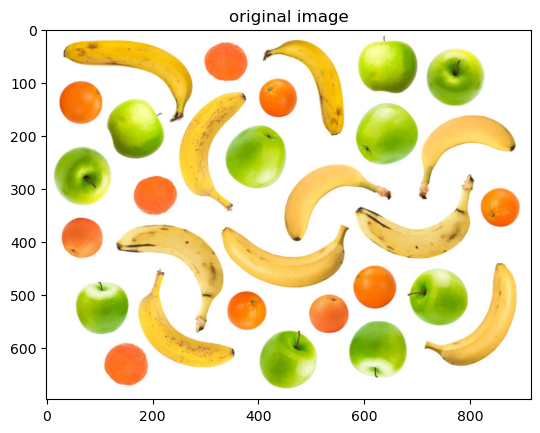

all batches are correct


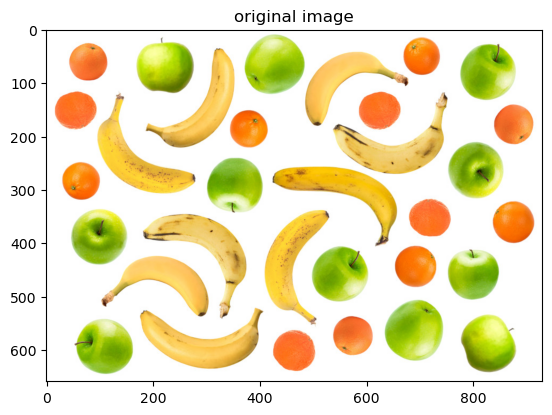

Remove 1 apple(s)
Add 1 banana(s)
Remove 2 mandarin(s)


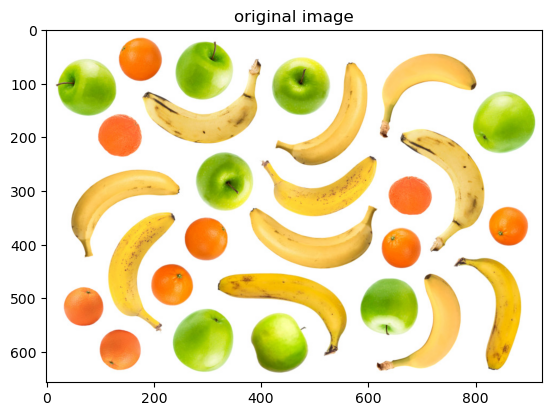

Add 2 apple(s)
Remove 1 banana(s)
Add 1 mandarin(s)


In [ ]:
from detectron2.data.datasets import register_coco_instances

register